# Lab 2: Crawling Data from Twitter

### Objective:
Learn how to crawl data with coordinates from twitter.

### Successful outcome:
Collect the tweets with coordinates within a certain region for certain time, then store it in a table. 

## Step 1: Getting Twitter API keys
    
In order to access the Twitter Streaming API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret. Follow the steps below to get all 4 elements:

a) Create a twitter account if you do not already have one.

b) Go to https://apps.twitter.com/ and log in with your twitter credentials.

c) Click "Create New App"
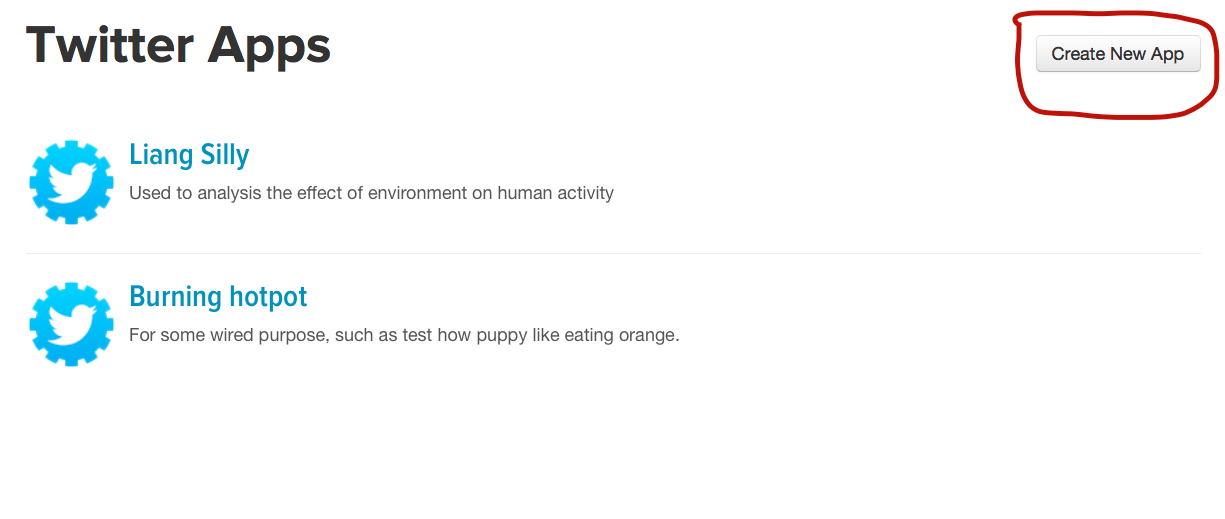

d) Fill out the form (the website can be your github homepage address), agree to the terms, and click "Create your Twitter application"
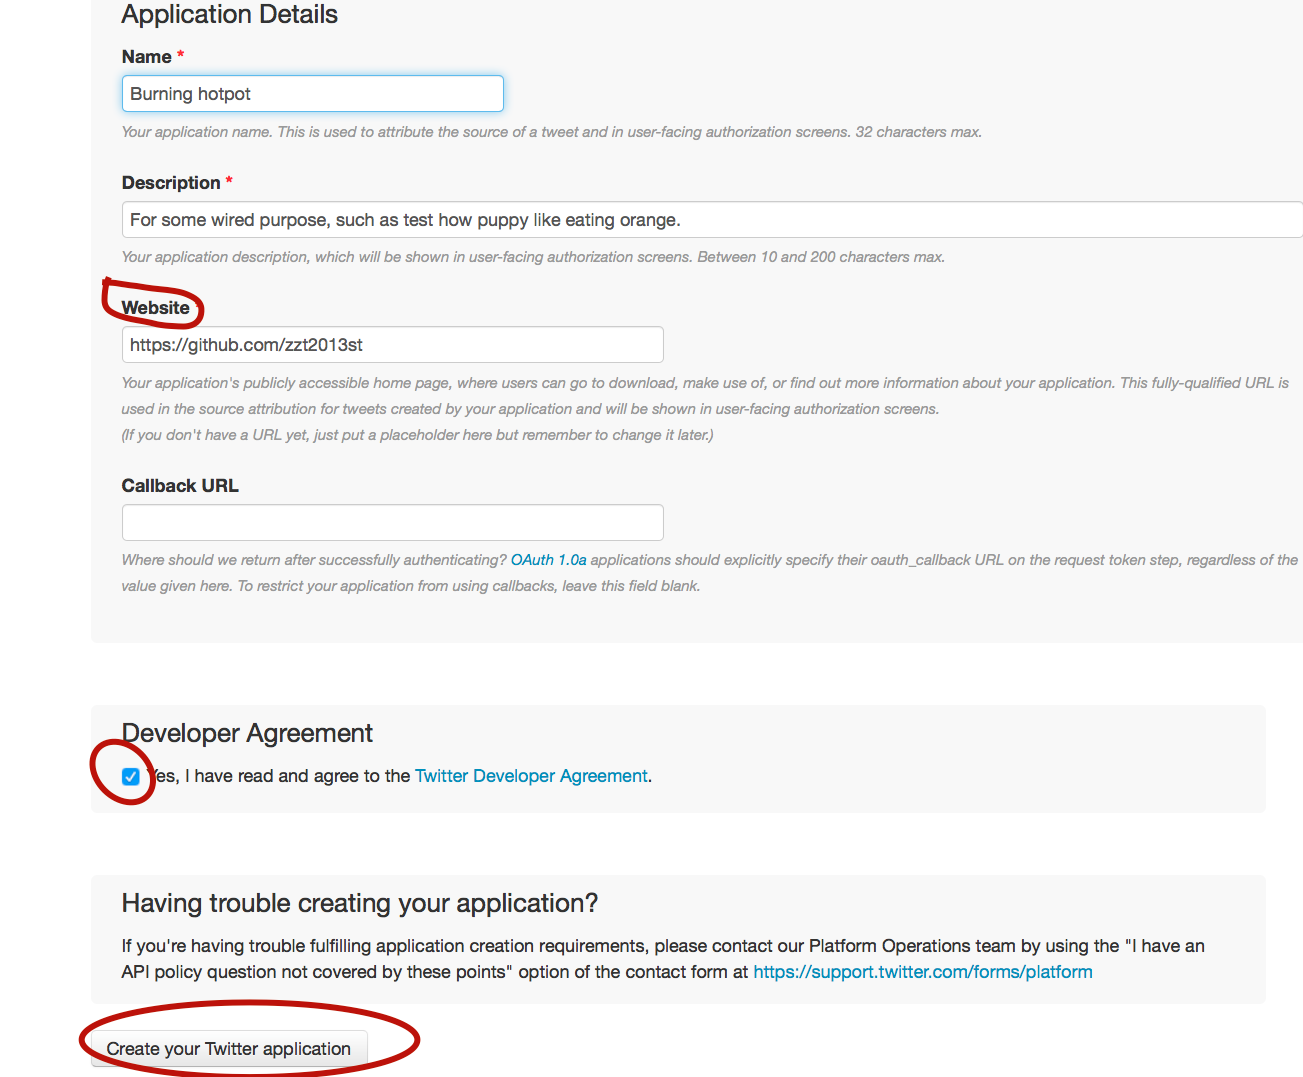

e) In the next page, click on "Keys and Access Tokens" tab, and copy your "API key" and "API secret".
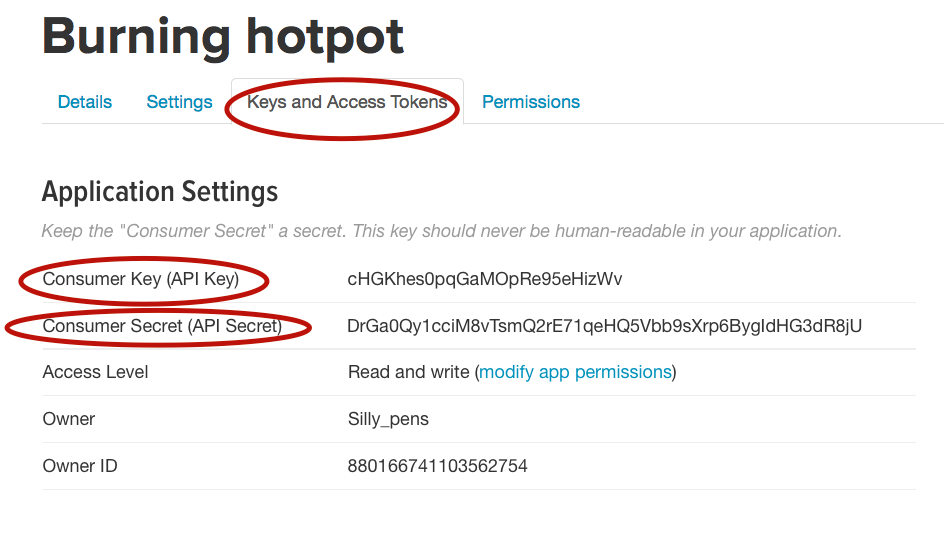

f) Scroll down and click "Create my access token". 
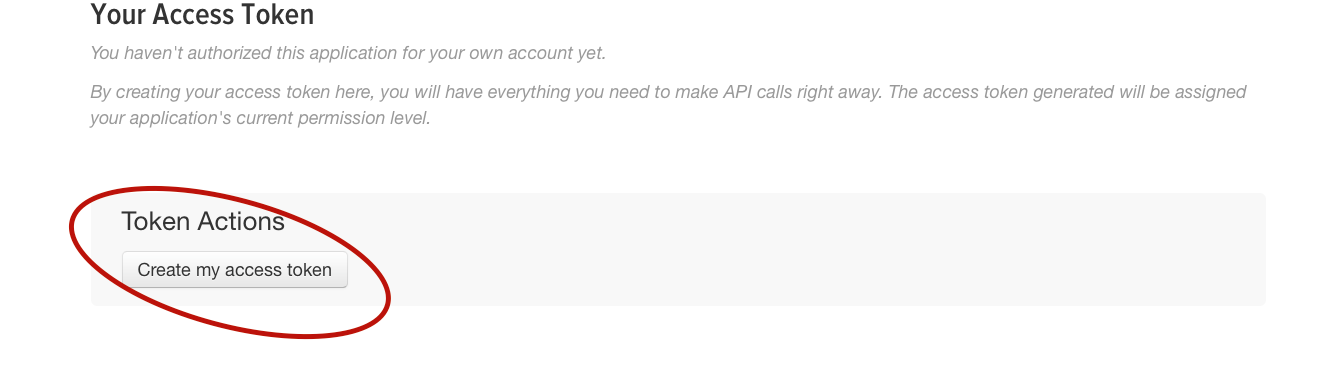

g) Copy your "Access token" and "Access token secret".
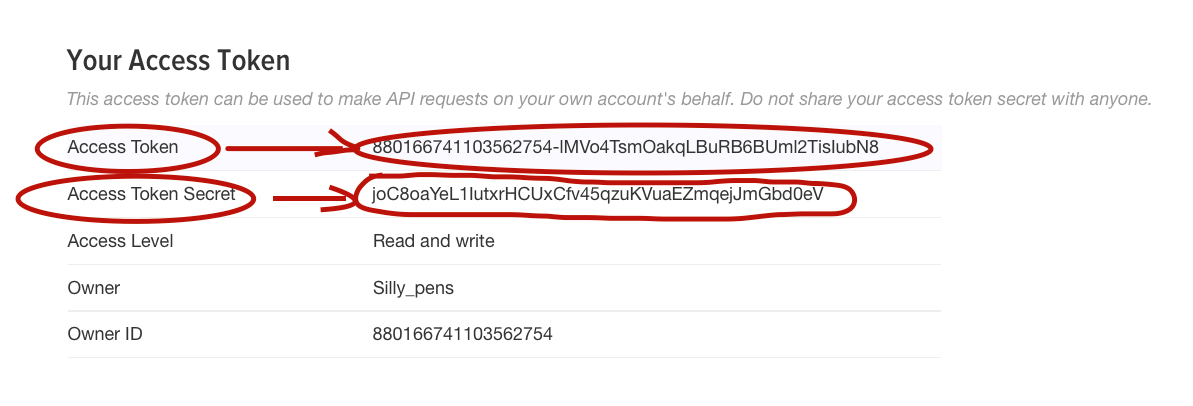


In [8]:
#Variables that contains the user credentials to access Twitter API from Step 1
consumer_key = 'cHGKhes0pqGaMOpRe95eHizWv'
consumer_secret = 'DrGa0Qy1cciM8vTsmQ2rE71qeHQ5Vbb9sXrp6BygIdHG3dR8jU'
access_token = '880166741103562754-lMVo4TsmOakqLBuRB6BUml2TisIubN8'
access_token_secret = 'joC8oaYeL1IutxrHCUxCfv45qzuKVuaEZmqejJmGbd0eV'

## Step 2: Install the packages

We will be using a Python library called Tweepy to connect to the Twitter Streaming API and download the data. If you don't have Tweepy installed in your machine, go to this website https://github.com/tweepy/tweepy, and follow the installation instructions.

In [9]:
#Import the necessary methods/packages from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import time
import json
import csv

## Step3: Find the current working directory, our data will be store in it.

In [3]:
pwd()

'/home/zhang303/ACE_592/Lab_2_Web_Crawlers'

## Step 4: Connecting to the Twitter Streaming API 
The code below is a basic listener that crawls the twitter data for a certain time period

In [13]:
class StdOutListener(StreamListener):

    def __init__(self, time_limit=40):
        # start_time: is the start running time of the program
        self.start_time = time.time()
        # limit is the the assigned running time of the program, its default value is 40
        self.limit = time_limit
        # csvfile is the file to store the data
        self.csvfile = open('/home/zhang303/ACE_592/Lab_2_Web_Crawlers/Twitter_Data.csv', 'w+')
        #self.csvwriter = csv.writer(csvfile)
        
        super(StdOutListener, self).__init__()
        
    
    # on_data function will keeping crawl the twitter post one by one, and store it into data parameter
    # There are only two ways to stop the program inside:
    #                on_data function return false
    #                on_error function catch a error
    def on_data(self, data):
        #  check if the program exceeded the time_limit of running time
        if (time.time() - self.start_time) < self.limit:
            # convert data to json format
            d = json.loads(data)
            
            # check whether the current twitter post has coordinates
            geo_flag = 0
            try:
                lon = d['coordinates']['coordinates'][0]
                lat = d['coordinates']['coordinates'][1]
                geo_flag = 1
            except:
                print('no coordinates')

            # We only want to see the twitter posts with coordinates
            if( geo_flag == 1 ):
                text = d['text']
                creat_time = d['created_at']
                print( 'catch data with coordinates' )
                # use str() to convert double/float to string
                #self.csvwriter.writerow( [creat_time, str(lon), str(lat), text] )
                self.csvfile.write( creat_time + "," + str(lon) + "," + str(lat) + "," + text.rstrip() + '\n');
                return True
        # If time exceeded, stop the program.
        else: 
            self.csvfile.close()
            return False

    # If an error occured, stop the program
    def on_error(self, status):
        print(status)
        



## Step 5: Running the main function to start crwaling

The stream.filter() function will filter the twitter data within a certain bounding box. 

In [15]:
if __name__ == '__main__':

    # This handles Twitter authentification and the connection to the Twitter Streaming API
    l = StdOutListener(300)
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    # A comma-separated list of longitude,latitude pairs specifying a set of bounding boxes to filter Tweets by
    # e.g. [-122.75,36.8,-121.75,37.8] indicates the area of San Francisco
    # detail of this api: https://dev.twitter.com/streaming/overview/request-parameters#locations
    stream.filter(locations=[ -122.75,36.8,-121.75,37.8])

no coordinates
catch data with coordinates
no coordinates
no coordinates
no coordinates
catch data with coordinates
catch data with coordinates
no coordinates
no coordinates
catch data with coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
catch data with coordinates
no coordinates
no coordinates
no coordinates
catch data with coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
catch data with coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
no coordinates
catch data with coordinates
no coordinates
catch data with coordinates
no coordinates
no coordinates
no coordinates
no coordinates
catch data wi

## Additional Notes:

Due to the crawling speed limits( about 10 tweets/minute ), we provide a Mumbai tweets data example( stored in /home/zhang303/r-training-notebooks/Mumbai_Data_example.csv, it has about 10K tweets ) for data analysis practice. 

## Limitations

### Speed Limitations:

Current Speed: 10 tweets with the geo coordinates per minutes. 			

Why it is hard to improve the speed by enlarging the crawling area:				
 1. The maximum crawling speed is about two tweets/second.				
 2. Since the data is randomly generated, so the rate of tweets with coordinates keeps around 8%. 										
 3. We can not really increase the maximum crawling speed or the rate of geo-coded tweets.


### Encoding issues:

An ideal summary of a tweet would look like:

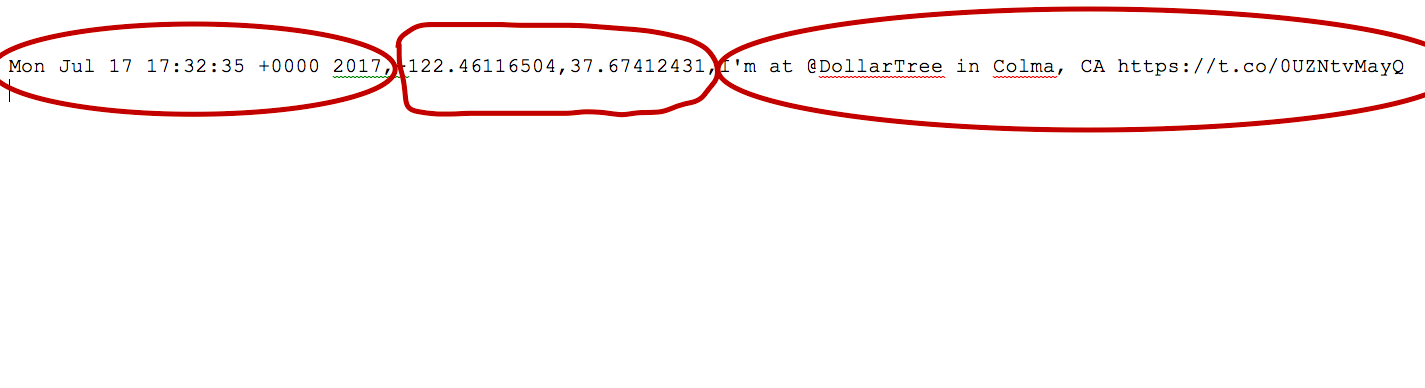

The Time, coordinates and text are seperated by a comma. 

However, due to the encoding problem, some tweets' text will have multiple lines. Then the output will look like:

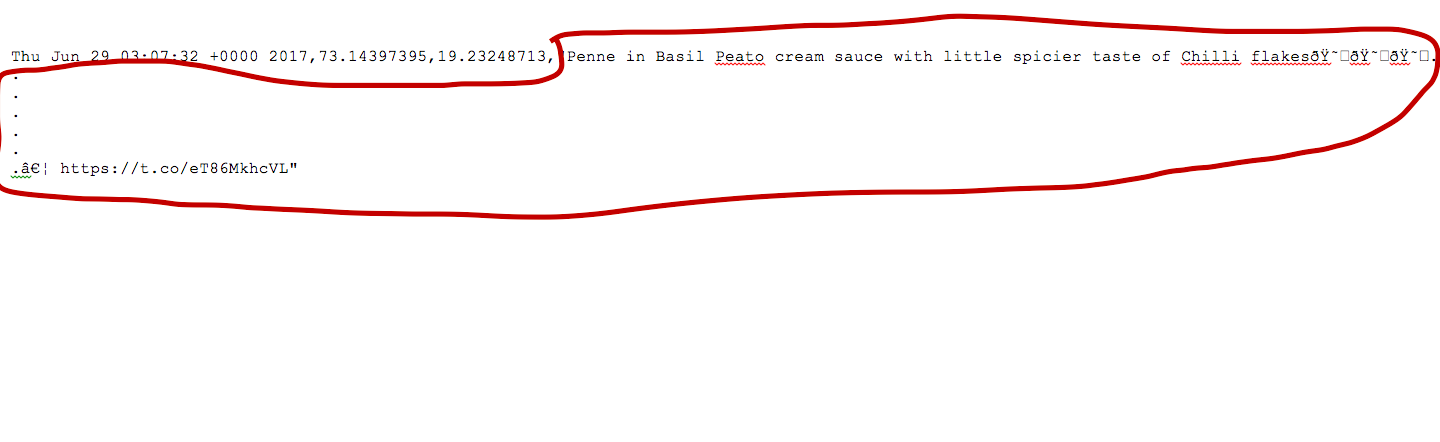

We can not simpily solve this problem by removing the extra lines from the text. The best way to approcah it is when we read the data and convert it to shp files(in QGIS), we can identify whether this line of data is some extra text or a new tweet, and only store the new tweets. 


Congratulations! You have learned how to successfully crawl data from tweets! If you want to train your crawling muscles a little bit more, ponder this exercise.

Crawling tweets using the stream API within the range of New York and with the tag of "dog" for 1 hour.  